In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import PIPS
%matplotlib inline
plt.rcParams['mathtext.fontset'],plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 14})

In [2]:
summary = pd.read_csv(f'summary_ver13.csv')#.set_index('id').sort_values(by='id')

In [3]:
summary.columns

Index(['id', 'M15_1_Ndata', 'M15_1_amplitude', 'M15_1_chi2/N',
       'M15_1_data_avg_err', 'M15_1_dec', 'M15_1_dist', 'M15_1_fname',
       'M15_1_period', 'M15_1_period_err', 'M15_1_ra', 'M15_2_Ndata',
       'M15_2_amplitude', 'M15_2_chi2/N', 'M15_2_data_avg_err', 'M15_2_dec',
       'M15_2_dist', 'M15_2_fname', 'M15_2_period', 'M15_2_period_err',
       'M15_2_ra', 'M15_3_Ndata', 'M15_3_amplitude', 'M15_3_chi2/N',
       'M15_3_data_avg_err', 'M15_3_dec', 'M15_3_dist', 'M15_3_fname',
       'M15_3_period', 'M15_3_period_err', 'M15_3_ra', 'M15_4_Ndata',
       'M15_4_amplitude', 'M15_4_chi2/N', 'M15_4_data_avg_err', 'M15_4_dec',
       'M15_4_dist', 'M15_4_fname', 'M15_4_period', 'M15_4_period_err',
       'M15_4_ra', 'period', 'period_err', 'amplitude', 'N_data', 'chi2/N',
       'data_mag_mean_err', 'dist_to_GCVS_deg', 'field', 'pick_method',
       'H&M_id', 'ra', 'dec', 'p_corwin', 'p_silbermann', 'p_ferro',
       'p_siegel', 'priors_mag_upper', 'priors_mag_lower',
       'prio

In [4]:
summary[['ra','dec','period','period_err','amplitude','mean_mag','type']]

,ra,dec,period,period_err,amplitude,mean_mag,type
0,322.458958,12.173970,1.437837,3.661651e-07,1.071,14.987350,Cepheid
1,322.443774,12.168692,0.684304,1.601163e-07,0.488,15.741276,RRab
2,322.422192,12.153865,0.388721,8.549906e-06,0.484,15.828362,RRc
3,322.460962,12.121596,0.313589,2.414403e-08,0.626,15.919276,RRc
4,322.464627,12.108085,0.384212,7.214155e-08,0.536,15.783994,RRc
...,...,...,...,...,...,...,...
164,322.494954,12.171465,1.043201,1.134967e-05,0.298,13.148673,??
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,322.491594,12.170759,0.864274,3.178918e-07,0.396,13.001821,??
167,322.490656,12.169706,0.911891,2.661795e-07,0.426,14.773248,Cepheid


In [5]:
summary['type']
RRab_star_names = []

for i in range(len(summary['type'])):
    if summary['type'][i] == 'RRab':
        RRab_star_names.append(summary['id'][i])
        
        
print(RRab_star_names)




['V002', 'V006', 'V008', 'V009', 'V012', 'V013', 'V015', 'V019', 'V020', 'V021', 'V022', 'V023', 'V025', 'V029', 'V032', 'V033', 'V035', 'V036', 'V044', 'V045', 'V046', 'V047', 'V049', 'V052', 'V055', 'V056', 'V060', 'V063', 'V065', 'V069', 'V072', 'V078', 'V097', 'V102', 'V103', 'V123']


In [6]:
summary = pd.read_csv(f'summary_ver13.csv').set_index('id').sort_values(by='id')

# def getdata_filtered(name):
#     path = summary.loc[name,'field']+'/summary/'+summary.loc[name,'H&M_id'][-3:]+'.dat'
#     period = summary.loc[name]['period']
#     data_V = PIPS.data_readin_LPP(path,filter='V')
#     data_B = PIPS.data_readin_LPP(path,filter='B')
    
#     # B-V estimate: mean difference of B-band against the nearest available V-band observations
#     B_V = np.mean([(data_B[1][i]-data_V[1][abs(data_V[0]-data_B[0][i]).argmin()]) for i in range(len(data_B[1]))])
                   
#     # prepare to cut bad datapoints
#     err_threshold = None if np.isnan(summary.loc[name,'err_cut']) else summary.loc[name,'err_cut']
#     mag_upper = None if np.isnan(summary.loc[name]['priors_mag_upper']) else summary.loc[name]['priors_mag_upper']
#     mag_lower = None if np.isnan(summary.loc[name]['priors_mag_lower']) else summary.loc[name]['priors_mag_lower']

#     # construct PIPS photdata object
#     original = PIPS.photdata(data_V)
#     original.err_cut_threshold = err_threshold
#     filtered = original.phot_err_cut().phot_mag_cut(mag_upper,mag_lower)
#     filtered.period = period
#     filtered.label = name
#     filtered.B_V = B_V
    
#     # characteristic intrinsic scatter: see section 2.2.2 in our paper
#     new_yerr = []
#     for i in filtered.yerr:
#         new_yerr.append(0.03 if i<0.03 else i)
#     filtered.yerr = np.array(new_yerr)
#     filtered.mag_err = filtered.yerr
        
#     return filtered

def getdata_filtered(name):
    path = summary.loc[name,'field']+'/summary/'+summary.loc[name,'H&M_id'][-3:]+'.dat'
    period = summary.loc[name]['period']
    data_V = PIPS.data_readin_LPP(path,filter='V')
    data_B = PIPS.data_readin_LPP(path,filter='B')
    
    # B-V estimate: mean difference of B-band against the nearest available V-band observations
    B_V = np.mean([(data_B[1][i]-data_V[1][abs(data_V[0]-data_B[0][i]).argmin()]) for i in range(len(data_B[1]))])
                   
    # prepare to cut bad datapoints
    err_threshold = None if np.isnan(summary.loc[name,'err_cut']) else summary.loc[name,'err_cut']
    mag_upper = None if np.isnan(summary.loc[name]['priors_mag_upper']) else summary.loc[name]['priors_mag_upper']
    mag_lower = None if np.isnan(summary.loc[name]['priors_mag_lower']) else summary.loc[name]['priors_mag_lower']

    # construct PIPS photdata object
    original = PIPS.photdata(data_V)
    original.err_cut_threshold = err_threshold
    filtered = original.phot_err_cut().phot_mag_cut(mag_upper,mag_lower)
    filtered.period = period
    filtered.label = name
    filtered.B_V = B_V
    filtered.N_B = len(data_B[1])
    filtered.get_epoch();
    # characteristic intrinsic scatter: see section 2.2.2 in our paper
    new_yerr = []
    for i in filtered.yerr:
        new_yerr.append(0.03 if i<0.03 else i)
    filtered.yerr = np.array(new_yerr)
    filtered.mag_err = filtered.yerr
        
    return filtered

[15.7312811  -0.20638732 -0.09701961 -0.04829988  0.03058456  0.55645494
  0.20787119 -0.22368358  2.26801666]


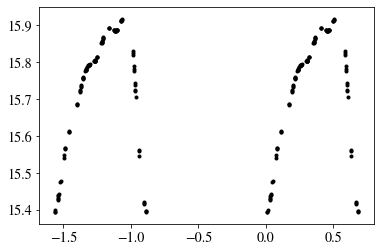

In [27]:
phot_obj = getdata_filtered('V002')

# popt = phot_obj.get_best_fit_at_p(phot_obj.period)
# x_th = np.linspace(0,phot_obj.period,1000)
# y_th = phot_obj.fourier_composition(x_th,2*np.pi/phot_obj.period,*popt)
# max_th = x_th[y_th==y_th.min()]
# phot_obj.x = phot_obj.x - max_th
# phot_obj.t = phot_obj.t - max_th
c_phi_list = phot_obj.alternate_get_best_fit_at_p(phot_obj.period)

print(c_phi_list)


y_new = phot_obj.alternate_fourier_composition(phot_obj.x%phot_obj.period, 2*np.pi/phot_obj.period, *c_phi_list)

plt.scatter(phot_obj.x%phot_obj.period, y_new, marker='.',color='k')
plt.scatter(phot_obj.x%phot_obj.period - np.pi/2, y_new, marker='.', color='k')

In [28]:
K = 4
print(c_phi_list)
for i in range(K):
    if c_phi_list[i+1]<0:
        c_phi_list[i+K+1] += np.pi
        c_phi_list[i+1] *= -1
    c_phi_list[i+5] = c_phi_list[i+5]%(2*np.pi)
    
print(c_phi_list)
phi_21 = (c_phi_list[6] - 2*c_phi_list[5])%(2*np.pi)
phi_31 = (c_phi_list[7] - 3*c_phi_list[5])%(2*np.pi)
phi_41 = (c_phi_list[8] - 4*c_phi_list[5])%(2*np.pi)

[15.7312811  -0.20638732 -0.09701961 -0.04829988  0.03058456  0.55645494
  0.20787119 -0.22368358  2.26801666]
[15.7312811   0.20638732  0.09701961  0.04829988  0.03058456  3.6980476
  3.34946384  2.91790907  2.26801666]


In [17]:
print(phi_21)
print(phi_31)
print(phi_41)

2.2365539568088693
4.390136894246615
0.04219688682387357


In [ ]:
Fe_H(phot_obj.period,phi31)

In [ ]:
phot_obj.Stellar_Properties_ab()

In [ ]:
metal_data, log_T_eff_data, M_v_data, log_L_data, mass_data, log_g_data = [],[],[],[],[],[]

C_1,C_2,C_3,C_4 = [],[],[],[]
phi_21, phi_31, phi_41 = [],[],[]

for i in range(len(RRab_star_names)):
    phot_obj_i = getdata_filtered(RRab_star_names[i])
    
    # Phase offset by fitted curve
#     popt = phot_obj_i.get_best_fit_at_p(phot_obj_i.period)
#     x_th = np.linspace(0,phot_obj_i.period,1000)
#     y_th = phot_obj_i.fourier_composition(x_th,2*np.pi/phot_obj_i.period,*popt)
#     max_th = x_th[y_th==y_th.min()]
#     phot_obj_i.x = phot_obj_i.x - max_th
#     phot_obj_i.t = phot_obj_i.t - max_th
    
    # Phase offset by data
    max_data = phot_obj.x[phot_obj.y==phot_obj.y.min()]%phot_obj.period
    phot_obj_i.x = phot_obj_i.x - max_data
    phot_obj_i.t = phot_obj_i.t - max_data
    
    
    values, parameters = phot_obj_i.Stellar_Properties_ab()
    metal_data.append(values[0])
    log_T_eff_data.append(values[1])
    M_v_data.append(values[2])
    log_L_data.append(values[3])
    mass_data.append(values[4])
    log_g_data.append(values[5])
    C_1.append(parameters[0])
    C_2.append(parameters[1])
    C_3.append(parameters[2])
    C_4.append(parameters[3])
    phi_21.append(parameters[4])
    phi_31.append(parameters[5])
    phi_41.append(parameters[6])
    
    
    
stellar_properties_dict = {'id':RRab_star_names, '$\\textrm{[Fe/H]}$':metal_data, '$\\log T_{eff}$': log_T_eff_data, '$M_v$':M_v_data,
                          '$\\log L$':log_L_data, '$M_\odot$':mass_data, '$\\log g$':log_g_data}

fourier_parameters_dict = {'id': RRab_star_names, '$C_1$':C_1,'$C_2$':C_2,'$C_3$':C_3, '$C_4$':C_4,
                          '$\\phi_{21} (V)$':phi_21,'$\\phi_{31} (V)$':phi_31,'$\\phi_{41} (V)$':phi_41}


In [ ]:
Stellar_Properties_AB_Stars = pd.DataFrame(stellar_properties_dict).set_index('id').sort_values(by='id')
Fourier_Parameters_AB_Stars = pd.DataFrame(fourier_parameters_dict).set_index('id').sort_values(by='id')

In [ ]:
Stellar_Properties_AB_Stars

In [ ]:
Fourier_Parameters_AB_Stars

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Metallicity vs. Temperature",fontsize=22)
plt.ylabel("[Fe/H]",fontsize=22)
plt.xlabel("$\\log T_{eff}$",fontsize=22)
plt.plot(Stellar_Properties_AB_Stars['$\\log T_{eff}$'],Stellar_Properties_AB_Stars['$\\textrm{[Fe/H]}$'], 'ko' )
plt.grid()
plt.show()

In [ ]:
data_Cacciari = pd.read_csv('Table_12.text', delim_whitespace=True).set_index('ID')
data_Cacciari_fourier = pd.read_csv('Table_9.text', delim_whitespace=True).set_index('ID')

In [ ]:
data_Cacciari

In [ ]:
plt.plot(data_Cacciari['log_T(B-V)'], data_Cacciari['[Fe/H]'], 'ko')

In [ ]:
data_Cacciari_fourier

In [ ]:
def Fe_H(period, phi): 
    phi_s = phi + 0.151 + np.pi
    return -5.241 - 5.394*period + 1.345*phi_s 


Fe_H(0.5205959,data_Cacciari_fourier['phi_31'][1])